In [9]:
import pandas as pd
import json
import os
import time
import matplotlib.pyplot as plt

In [10]:
# data holds a dict of a sample run to use for testing purposes

testf = open('sample.run')

data = json.load(testf)

data

{'gold_per_floor': [119,
  139,
  158,
  172,
  185,
  185,
  213,
  229,
  229,
  246,
  246,
  277,
  277,
  75,
  75,
  146,
  146,
  163,
  193,
  212,
  262,
  280,
  309,
  309,
  322,
  370,
  370,
  370,
  370,
  384,
  384,
  384,
  461,
  461,
  479,
  494,
  199,
  199,
  246,
  258,
  282,
  294,
  378,
  390,
  31,
  58,
  58,
  78,
  78,
  78],
 'floor_reached': 51,
 'playtime': 9059,
 'items_purged': ['Defend_P', 'Strike_P', 'Strike_P'],
 'score': 1205,
 'play_id': 'b173af22-458b-497e-8a20-f02a0b7ae345',
 'local_time': '20230315144117',
 'is_ascension_mode': True,
 'campfire_choices': [{'data': 'Eruption', 'floor': 6.0, 'key': 'SMITH'},
  {'floor': 15.0, 'key': 'REST'},
  {'floor': 24.0, 'key': 'REST'},
  {'floor': 27.0, 'key': 'REST'},
  {'data': 'Adaptation', 'floor': 29.0, 'key': 'SMITH'},
  {'floor': 32.0, 'key': 'REST'},
  {'floor': 42, 'key': 'REST'},
  {'floor': 44, 'key': 'REST'},
  {'floor': 49, 'key': 'REST'}],
 'neow_cost': 'TEN_PERCENT_HP_LOSS',
 'seed_source

In [11]:
# sets up character names array and array of dictionaries that will hold runs for each character

chars = ['IRONCLAD', 'THE_SILENT', 'DEFECT', 'WATCHER']
dicts = []

In [12]:
# fill out dicts array with total current runs for each character

# saves path to slay the spire runs folder
dirpath = r'C:\Program Files (x86)\Steam\steamapps\common\SlayTheSpire\runs'

# for each character, creates array and appends a dict containing info for each run file in character's run folder
for name in chars:
    runs = []
    for path in os.listdir(dirpath + "\\" + name):
        f = open(dirpath + "\\" + name + "\\" + path)
        runs.append(json.load(f))
        last = runs[-1]
        if ('PrismaticShard' in last["relics"]):
            print(last)
            runs.pop()
        f.close()
    dicts.append(runs)

In [13]:
# getWinRates() gets and returns the win rates for each character
def getWinRates():
    char_wrs = []
    for x, c in enumerate(dicts):
        char_wrs.append([0, 0])
        for r in c:
            char_wrs[x][1] += 1
            if (r["victory"]):
                char_wrs[x][0] += 1
        char_wrs[x].append(round(char_wrs[x][0] / char_wrs[x][1], 2))

    return char_wrs

In [14]:
# getScores() gets and returns high + avg scores for each char.
def getScores():
    scrs = []
    for x, c in enumerate(dicts):
        scrs.append([0])
        scores = 0
        cnt = 0
        for r in c:
            scores += r["score"]
            cnt += 1
            if (r["score"] > scrs[x][0]):
                scrs[x][0] = r["score"]
        scrs[x].append(int(scores / cnt))
    return scrs

In [15]:
# getAvgFlrs() calculates and returns avg floor for each char., including and not including wins (reaching lvl 51)
def getAvgFlrs():
    avgFlrs = []
    for x, c in enumerate(dicts):
        flrs = 0
        cnt = 0
        flrs_nw = 0
        cnt_nw = 0
        for r in c:
            flrs += r["floor_reached"]
            cnt += 1
            if (not r["victory"]):
                flrs_nw += r["floor_reached"]
                cnt_nw += 1
        avgFlrs.append([int(flrs/cnt), int(flrs_nw/cnt_nw)])
    return avgFlrs

In [16]:
char_info_cols = ['Wins', 'Games', 'Win_Rate', 'High_Score', 'Avg_Score', 'Avg_Flr', 'Avg_Flr_No_Wins']
info_dict = {chars[0]: [], chars[1]: [], chars[2]: [], chars[3]: []}

wrs = getWinRates()
scrs = getScores()
avgFlrs = getAvgFlrs()
for i, c in enumerate(chars):
    info_dict[c] = info_dict[c] + wrs[i] + scrs[i] + avgFlrs[i]

char_df = pd.DataFrame.from_dict(info_dict, orient='index', columns=char_info_cols)

char_df

,Wins,Games,Win_Rate,High_Score,Avg_Score,Avg_Flr,Avg_Flr_No_Wins
IRONCLAD,8,18,0.44,1455,795,38,28
THE_SILENT,12,30,0.40,1735,736,33,22
DEFECT,7,14,0.50,1438,824,39,27
WATCHER,14,20,0.70,1698,1109,48,43


In [17]:
""" char_df_html = char_df.drop(['High_Score', 'Avg_Score', 'Avg_Flr', 'Avg_Flr_No_Wins'], axis=1).rename(columns={"Win_Rate":"Win Rate"}, index={"THE_SILENT":"SILENT"})
f = open("../../scripts/overall_df.txt", "w")
f.write(char_df_html.to_html(table_id="info-table", border=0))
f.close() """

' char_df_html = char_df.drop([\'High_Score\', \'Avg_Score\', \'Avg_Flr\', \'Avg_Flr_No_Wins\'], axis=1).rename(columns={"Win_Rate":"Win Rate"}, index={"THE_SILENT":"SILENT"})\nf = open("../../scripts/overall_df.txt", "w")\nf.write(char_df_html.to_html(table_id="info-table", border=0))\nf.close() '

In [18]:
wr_info = []

for x in range(0,4):
    wr_arr = []
    wr_arr.append(char_df['Win_Rate'][x])
    wr_arr.append(char_df['Wins'][x])
    wr_arr.append(char_df['Games'][x])
    wr_info.append(wr_arr)

C:\Users\happy\AppData\Local\Temp\ipykernel_18908\3422709739.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wr_arr.append(char_df['Win_Rate'][x])
C:\Users\happy\AppData\Local\Temp\ipykernel_18908\3422709739.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wr_arr.append(char_df['Wins'][x])
C:\Users\happy\AppData\Local\Temp\ipykernel_18908\3422709739.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wr_arr.append(char_df['Ga

In [19]:
filepath = "../../scripts/overall_wr_info.txt"
if os.path.exists(filepath):
    f.close()
    os.remove(filepath)
f = open(filepath, "w")
f.write(str(wr_info))
f.close()

In [20]:
# gets and stores dict of neow bonuses keying to dicts of costs and wins/games (neows) 
# and dict (bonus_info) of neow bonuses keying to overall wins/games

neows = {}
bonus_info = {}
for c in dicts:
    for r in c:
        bonus = r['neow_bonus']
        cost = r['neow_cost']
        neows.setdefault(bonus, {})
        bonus_info.setdefault(bonus, [0, 0])
        neows[bonus].setdefault(cost, [0, 0])
        neows[bonus][cost][1] += 1
        bonus_info[bonus][1] += 1
        if(r['victory']):
            neows[bonus][cost][0] += 1
            bonus_info[bonus][0] += 1

In [21]:
# puts neow's bonuses' wins/times chosen/win rates into (nw_df) and displays it

print("Neow's Bonus Win Rates")

# put into dataframe
neow_columns = ["Wins", "Times_Chosen"]
nw_df = pd.DataFrame.from_dict(bonus_info, orient='index', columns=neow_columns)
nw_df.columns.name = "Neow's_Bonus"
nw_df['Win_Rate'] = round(nw_df['Wins'] / nw_df['Times_Chosen'], 2)
nw_df = nw_df.sort_values(by=['Win_Rate', 'Times_Chosen'], ascending=False)
nw_df

Neow's Bonus Win Rates


Neow's_Bonus,Wins,Times_Chosen,Win_Rate
BOSS_RELIC,2,2,1.00
ONE_RANDOM_RARE_CARD,1,1,1.00
THREE_RARE_CARDS,4,5,0.80
REMOVE_CARD,3,4,0.75
TEN_PERCENT_HP_BONUS,3,4,0.75
RANDOM_COLORLESS_2,3,4,0.75
REMOVE_TWO,8,11,0.73
HUNDRED_GOLD,2,3,0.67
ONE_RARE_RELIC,4,9,0.44
THREE_ENEMY_KILL,6,15,0.40


In [22]:
nw_df_html = nw_df.rename(columns={"Times_Chosen":"Times Chosen", "Win_Rate":"Win Rate"})
f = open("../../scripts/neow_body.txt", "w")
f.write(nw_df_html.to_html(table_id="nw-body", border=0, header=False))
f.close()

In [23]:
# function that takes reference to a neow bonus dictionary (has costs + wins/times_chosen) and returns a df of cost info for that bonus

def create_bonus_df(bonus):

    df = pd.DataFrame.from_dict(bonus, orient='index', columns=neow_columns)
    df['Win_Rate'] = round(df['Wins'] / df['Times_Chosen'], 2)
    df.insert(0, "Neow's Cost", df.index.values)
    df = df.sort_values(by=['Times_Chosen'], ascending=False)
    df = df.sort_values(by=['Win_Rate'], ascending=False)
    df = df.reset_index(drop=True)
    df = df.rename(columns={"Times_Chosen":"Times Chosen", "Win_Rate":"Win Rate"})
    return df

In [24]:
neows_html = {}
f = open("../../scripts/neow-bycost-tables.txt", "w")

for bonus in neows:
    if ("NONE" in neows[bonus]):
        continue

    cost_df = create_bonus_df(neows[bonus])
    cost_df = cost_df.set_index(["Neow's Cost"])
    cost_df.index.name = None
    tableID = bonus.replace("_", "-").lower() + "-T"
    neows_html[tableID] = cost_df.to_html(table_id=tableID, border=0)

f.write(json.dumps(neows_html))
    
f.close()

In [25]:
# funcation that takes df for a neow bonus and name of bonus and prints a table with cost info for that bonus

def plot_bonus_table(bonus_name):
    df = create_bonus_df(neows[bonus_name])
    fig = plt.figure(figsize = (8, .2))
    tbl = fig.add_subplot(111)

    tbl.table(cellText = df.values, rowLabels = df.index,
            colLabels = df.columns, cellLoc='center')
    tbl.set_title(bonus_name)
    tbl.axis('off')

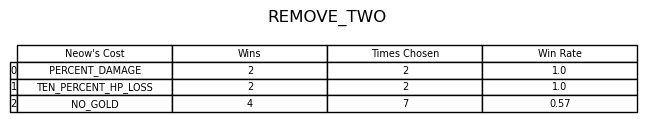

In [26]:
# for seeing win rate table of certain bonus + it's costs
bonus_name = 'REMOVE_TWO'
plot_bonus_table(bonus_name)

In [27]:
# caculate and store wins + games for each relic in (relics) dict
acts = [17, 34, 51]
relics = {}                                 # relics = {act1 = {r1 = [x,y], ...}, ...}

for c in dicts:
    for r in c:
        win = r['victory']
        for relic in r['relics']:
            relics.setdefault(relic, [0,0])
            relics[relic][1] += 1
            if (win):
                relics[relic][0] += 1

In [28]:
# creates dataframe with # wins, # games, and winrates of all relics in (r_df) and prints it
print("ALL RELIC WIN RATES")

relic_columns = ['Wins', 'Games']
r_df = pd.DataFrame.from_dict(relics, orient='index', columns=relic_columns)
r_df.columns.name = 'Relic'
r_df['Win_Rate'] = round(r_df['Wins'] / r_df['Games'], 2)
r_df = r_df.sort_values(by=['Win_Rate', 'Games'], ascending=False)

for r in r_df.index:
    print(r)

ALL RELIC WIN RATES
Pandora's Box
Lizard Tail
Smiling Mask
OrangePellets
Girya
FossilizedHelix
Nuclear Battery
Sling
Enchiridion
SacredBark
Damaru
Runic Cube
Self Forming Clay
Medical Kit
Ice Cream
Paper Crane
Turnip
CaptainsWheel
Cables
TeardropLocket
Black Blood
Mark of Pain
Necronomicon
WristBlade
Tingsha
The Specimen
Cauldron
Symbiotic Virus
Emotion Chip
CultistMask
CloakClasp
TheAbacus
Runic Dome
Melange
GoldenEye
Regal Pillow
Busted Crown
Runic Pyramid
Pantograph
Ginger
SlaversCollar
Question Card
Singing Bowl
Happy Flower
Mummified Hand
Thread and Needle
Ninja Scroll
Meat on the Bone
Whetstone
Kunai
Pen Nib
WingedGreaves
Toy Ornithopter
Snake Skull
Matryoshka
Mercury Hourglass
Akabeko
Pocketwatch
Prayer Wheel
Ornamental Fan
Calipers
ClockworkSouvenir
Nilry's Codex
Peace Pipe
Torii
Toxic Egg 2
Bottled Flame
Shuriken
DollysMirror
Shovel
Orrery
Bag of Preparation
Golden Idol
Bag of Marbles
Molten Egg 2
StrikeDummy
Blue Candle
PureWater
PreservedInsect
Letter Opener
HornCleat
Red Ma

In [29]:
bossR = ["Astrolabe", "Black Blood", "Black Star", "Busted Crown", "Calling Bell", "Coffee Dripper", "Cursed Key", "Ectoplasm", "Empty Cage", "Frozen Core", "Fusion Hammer", "Holy Water", "Hovering Kite", "Inserter", "Mark of Pain", "Nuclear Battery", "Pandora's Box", "Philosopher's Stone", "Ring of the Serpent", "Runic Cube", "Runic Dome", "Runic Pyramid", "Sacred Bark", "Slaver's Collar", "Snecko Eye", "Sozu", "Tiny House", "Velvet Choker", "Violet Lotus", "Wrist Blade"]

In [30]:
boss_r_df = pd.DataFrame(columns=relic_columns)
for r in r_df.index:
    if r in bossR:
        boss_r_df = pd.concat([boss_r_df, r_df.loc[r_df.index == r]])

boss_r_df

,Wins,Games,Win_Rate
Pandora's Box,8,8,1.00
Nuclear Battery,4,4,1.00
Runic Cube,2,2,1.00
Black Blood,1,1,1.00
Mark of Pain,1,1,1.00
Runic Dome,1,1,1.00
Busted Crown,8,9,0.89
Runic Pyramid,7,8,0.88
Fusion Hammer,6,9,0.67
Coffee Dripper,2,3,0.67


In [31]:
# creates (sm_r_df) with 3 most gotten relics of each win rate value and prints it
sm_r_df = pd.DataFrame()
wRates = r_df['Win_Rate'].unique()

for wr in wRates:
    sm_r_df = pd.concat([sm_r_df, r_df.loc[r_df['Win_Rate'] == wr].head(3)])

sm_r_df

Relic,Wins,Games,Win_Rate
Pandora's Box,8,8,1.00
Lizard Tail,6,6,1.00
Smiling Mask,5,5,1.00
Regal Pillow,10,11,0.91
Busted Crown,8,9,0.89
...,...,...,...
Gambling Chip,1,3,0.33
Mango,1,6,0.17
Nloth's Gift,0,2,0.00
Brimstone,0,1,0.00


In [32]:
def name_to_num(month):
    match month:
        case "Jan":
            return "01"
        case "Feb":
            return "02"
        case "Mar":
            return "03"
        case "Apr":
            return "04"
        case "May":
            return "05"
        case "Jun":
            return "06"
        case "Jul":
            return "07"
        case "Aug":
            return "08"
        case "Sep":
            return "09"
        case "Oct":
            return "10"
        case "Nov":
            return "11"
        case "Dec":
            return "12"

In [33]:
runs_abrv = {"Date": [], "Character": [], "Ascension_Level": [], "Floor_Reached": [], "Heart": [], "Win": []}

for x,c in enumerate(dicts):
    for r in c:
        timestamp = time.ctime(r["timestamp"]).split()
        if (len(timestamp[2]) == 1):
            timestamp[2] = "0" + timestamp[2]
        runs_abrv["Date"].append(name_to_num(timestamp[1]) + "/" + timestamp[2] + "/" + timestamp[4][2:])

        runs_abrv["Character"].append(chars[x].replace("THE_", ""))

        if (r["is_ascension_mode"]):
            runs_abrv["Ascension_Level"].append("Asc " + str(r["ascension_level"]))
        else:
            runs_abrv["Ascension_Level"].append("No Asc")

        flr_rched = r["floor_reached"]
        runs_abrv["Floor_Reached"].append(flr_rched)
        heart = "No"
        if (flr_rched > 53):
            heart = "Yes"
        runs_abrv["Heart"].append(heart)
        
        if (r["victory"]):
            runs_abrv["Win"].append("Y")
        else:
            runs_abrv["Win"].append("N")

In [34]:
runs_df = pd.DataFrame.from_dict(runs_abrv)

dateSort = []
for d in runs_df['Date']:
    dateList = d.split('/')
    dateList[0], dateList[1] = dateList[1], dateList[0]
    dateSort.append(''.join(dateList[::-1]))

runs_df['Sort'] = dateSort

runs_df.index.name = None
runs_df = runs_df.sort_values('Sort', ascending=False)
runs_df = runs_df.drop(axis=1, columns=['Sort'])
runs_df = runs_df.set_index('Date')
runs_df.index.name = None
runs_df

,Character,Ascension_Level,Floor_Reached,Heart,Win
12/14/23,SILENT,Asc 20,51,No,N
12/14/23,SILENT,Asc 20,16,No,N
08/06/23,WATCHER,Asc 18,51,No,Y
07/28/23,DEFECT,Asc 16,51,No,Y
07/28/23,SILENT,Asc 18,51,No,Y
...,...,...,...,...,...
02/14/23,WATCHER,Asc 6,51,No,Y
02/13/23,WATCHER,Asc 6,40,No,N
02/13/23,WATCHER,Asc 6,33,No,N
02/12/23,SILENT,Asc 7,51,No,Y


In [35]:
runs_df_html = runs_df.rename(columns={"Character":"Character", "Ascension_Level":"Asc", "Floor_Reached":"Floor", "Win":"More"})
runs_header = pd.DataFrame([list(runs_df_html.columns)]).to_html(table_id="runs-head", border=0, header=None)
f = open("../../scripts/all_runs.txt", "w")
f.write(runs_header + "," + runs_df_html.to_html(table_id="runs", border=0, header=None))
f.close()

In [36]:
# runs_header = pd.DataFrame([list(runs_df_html.columns)]).set_index('0')
# runs_header